cvt_1d.ipynb

Discussion: This Jupyter notebook investigates Centroidal Voronoi Tessellations in 1D.

Licensing: This code is distributed under the GNU LGPL license.
    
Modified: 01 November 2016

Author: John Burkardt, Lukas Bystricky

In [2]:
# Import necessary libraries and set plot option
%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

Using matplotlib backend: agg


# CVT's in 1D #

In one dimension, many geometric calculations are easy to make exactly.
We will take advantage of this fact to make a simple introduction to
centroidal Voronoi tessellations.

We will look at
* how to compute the subregions and centroids of a Voronoi diagram in 1D;
* how to write a function that takes one step of a 1D CVT iteration.
* how to construct a CVT iteration;
* how to compute and plot the energy of a Voronoi diagram;
* how to plot the evolution of the positions of the generator points.

# Subregions and Centroids #

Suppose we have a set of N points G spread over an interval.
For simplicity, we'll assume the interval is [0,1], and we
will assume that the points G are sorted.

What is the Voronoi subregion associated with point G(i)?
Assume for simplicity that G(i) is not the first or last 
point in the set.  Then the local neighborhood looks like
...G(i-1)..........G(i)..........G(i+1)
and we can insert points A(i) and B(i), which are the left
and right limits of the Voronoi subregion of G(i):
...G(i-1)...A(i)...G(i)...B(i)...G(i+1)...
so that all the points inside [A(i),B(i)] are closer to G(i)
than to G(i-1), G(i+1), or any other G point.

It's easy to see that A(i) must be midway between G(i-1) and G(i),
and the B(i) is midway between G(i) and G(i+1), so
  A(i) = (G(i-1)+G(i))/2
  B(i) = (G(i)+G(i+1))/2
and the centroid is the average of these two points:
  C(i) = (A(i)+B(i))/2

Note, however, that if G(i) is the first element of G, then A(i) 
must be 0, and if G(i) is the last element of G, then B(i) must be 1.

In [7]:
#  cvt_1d_step()
#
#  Write a function:
#
#  def cvt_1d_step ( g ):
#    ***
#    return c
#
#  which accepts N 1D points G as input, and returns the 
#  centroids C as output.
#
def cvt_1d_step ( g ):
  n = g.shape[0]
  a = np.zeros ( n )
  b = np.zeros ( n )
  a[0] =     0.0
  a[1:n] =   ( g[0:n-1] + g[1:n] ) / 2.0
  b[0:n-1] = ( g[0:n-1] + g[1:n] ) / 2.0
  b[n-1]   = 1.0
  c = ( a + b ) / 2.0
  return c
#
#  Test the function.
#
g = np.array ( [0.1, 0.3, 0.4, 0.7, 0.85 ] )
c = cvt_1d_step ( g )
print ( c )

[ 0.1     0.275   0.45    0.6625  0.8875]


# A basic CVT iteration #

Now we want to set up a very simple CVT iteration for the 1D problem
We are given a starting set of N points G.  We call cvt_1d_step()
to get the centroids C.  We replace G by C (careful.  In Python
you don't say G=C, but G=C.copy()!).  You do this M times, and
return the final "improved" values of G.

Write a function:

def cvt_1d ( g, m ):
  ***
  return g
  
You should probably sort the points G, just in case the user
didn't.  This can be done by the statement "g.sort()".

In [9]:
# cvt_1d()

def cvt_1d ( g, m ):
  g.sort ( )
  for step in range ( 0 , m ):
    c = cvt_1d_step ( g )
    g = c.copy ( )
  return g
#
#  Test the function.
#
g = np.random.random ( 10 )
print ( g )
g = cvt_1d ( g, 200 )
print ( g )

[ 0.18197355  0.74829031  0.96554985  0.25288854  0.93519995  0.15256047
  0.50021743  0.78243645  0.99311324  0.25395166]
[ 0.05011037  0.15032031  0.25049889  0.35062864  0.45069685  0.55069685
  0.65062864  0.75049889  0.85032031  0.95011037]



# Computing the Energy #

Recall that, for the 1D case, given generators G, the energy of a point x
is determined by finding g(i), the nearest generator, and then computing:
  e_point(x) = (x-g(i))^2

The energy of the i-th subregion p(i), associatd with g(i), is
  e_subregion(i) = integral ( x in p(i) ) e_point(x)

The total energy of a 1D Voronoi diagram is
  e_total(G) = sum ( all i ) ( e_subregion ( i ) )

write a function 

def total_energy ( g ):
  ***
  return e
  
which returns the total energy of a 1D Voronoi diagram.  Given
the points G, you have to compute the limits A and B, and then,
for each i, evaluate 
  integral ( a(i) <= x <= b(i) ) ( x - g(i) )^2
and sum them up.

Test your code by starting with a set of 5 points in G and compute the energy.
Then, four times in a row, call cvt_1d_step, replace G by C and compute the new energy.
You should see the energy decrease.

In [10]:
def total_energy ( g ):
  n = g.shape[0]
  a = np.zeros ( n )
  b = np.zeros ( n )
  a[0] =     0.0
  a[1:n] =   ( g[0:n-1] + g[1:n] ) / 2.0
  b[0:n-1] = ( g[0:n-1] + g[1:n] ) / 2.0
  b[n-1]   = 1.0

  e = 0.0
  for i in range ( 0, n ):
    e_subregion = ( ( b[i] - g[i] ) ** 3 - ( a[i] - g[i] ) ** 3 ) / 3.0
    e = e + e_subregion
  return e
#
#  Test the function.
#
g = np.array ( [0.1, 0.3, 0.4, 0.7, 0.85 ] )
e = total_energy ( g )
print ( e )

c = cvt_1d_step ( g )
g = c.copy ( )
e = total_energy ( g )
print ( e )

c = cvt_1d_step ( g )
g = c.copy ( )
e = total_energy ( g )
print ( e )

c = cvt_1d_step ( g )
g = c.copy ( )
e = total_energy ( g )
print ( e )

0.00473958333333
0.00345003255208
0.00340912373861
0.00339174457391


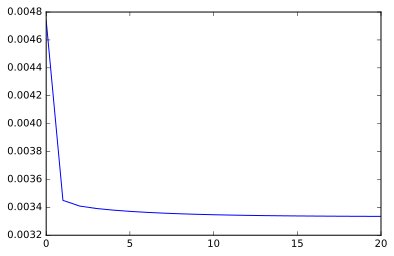

In [12]:
# Plot the energy
#
#  Start with 20 random points in [0,1], and call cvt_1d_step() 20 times,
#  each time computing the energy and saving its value in a vector e_vector.
#  Then make a plot of e_vector to observe the behavior of the energy.
#
m = 20
e_vector = np.zeros ( m + 1 )
g = np.array ( [0.1, 0.3, 0.4, 0.7, 0.85 ] )
e = total_energy ( g )
e_vector[0] = e
for i in range ( 0, m ):
  c = cvt_1d_step ( g )
  g = c.copy ( )
  e = total_energy ( g )
  e_vector[i+1] = e

plt.plot ( e_vector )

# Watch the points move #

It can be interesting, in the 1D case, to watch how all the points
move from one step to the next, by making a plot.

To do this, we have to make a table with M+1 rows (start + number of steps)
and N columns (number of points).  We save the starting value of G, and
each improved value.  Then we plot each column (column 0 will show how
point g[0] moved, column 1 how g[1] moved and so on)

Try this for the sample data from the previous exercise.

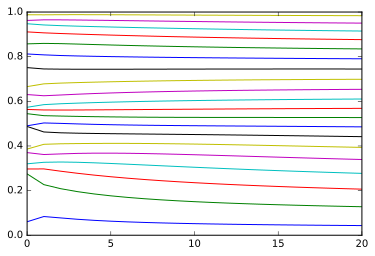

In [16]:
# Plot the points as they move
#
#  Start with 20 random points in [0,1], and call cvt_1d_step() 20 times,
#  each time computing the energy and saving its value in a vector e_vector.
#  Then make a plot of e_vector to observe the behavior of the energy.
#
m = 20
n = 20
x_vector = np.zeros ( [ m + 1, n ] )
g = np.random.random ( n )
g.sort()
x_vector[0,:] = g.copy ( )
for i in range ( 0, m ):
  c = cvt_1d_step ( g )
  g = c.copy ( )
  x_vector[i+1,:] = g.copy ( )

for j in range ( 0, n ):
  plt.plot ( x_vector[:,j] )